In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1. Import Python libraries & Understanding the Data**

In [1]:
# Import necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/kaggle/input/mutual-fund-data-india/comprehensive_mutual_funds_data.csv")

In [5]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


*** Let check number of rows and columns in this data**

In [6]:
df.shape

(814, 20)

**This file contains 814 rows and 20 columns**

*** Let know Columns Data Type**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

*** Let's generates descriptive statistics for each numeric column in the DataFrame.**

In [8]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


# **2. Handling Missing Values**

In [9]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

**1) 3yr return and 5 yr return mean value is same as 50 percentile so we can replace missing values by it'mean**

**2) In mutual fund we cannot predict return as every mutual fund performance is not same**

**3) But for accuracte statical analysis we have to handle missing values**

In [10]:
df['returns_3yr'] = df['returns_3yr'].fillna(df['returns_3yr'].mean())
df['returns_5yr'] = df['returns_5yr'].fillna(df['returns_5yr'].mean())

In [11]:
df.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

# **3. Analyze Categorical and Numerical Features Seperately**

# Categorical Features EDA

In [12]:
cat_col = df.select_dtypes(exclude = ['int64','float64'])
print(cat_col.columns)

Index(['scheme_name', 'fund_manager', 'sortino', 'alpha', 'sd', 'beta',
       'sharpe', 'amc_name', 'category', 'sub_category'],
      dtype='object')


In [13]:
cat_col.head(2)

,scheme_name,fund_manager,sortino,alpha,sd,beta,sharpe,amc_name,category,sub_category
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Aditya Birla Sun Life Mutual Fund,Other,FoFs Domestic
1,Aditya Birla SL Arbitrage Fund,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,Aditya Birla Sun Life Mutual Fund,Hybrid,Arbitrage Mutual Funds


In [14]:
df.head(2)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5


In [15]:
cat_col['amc_name'].value_counts()
#This is useful in analyzing the distribution of mutual fund providers in the dataset.

amc_name
ICICI Prudential Mutual Fund         57
Aditya Birla Sun Life Mutual Fund    49
SBI Mutual Fund                      48
Sundaram Mutual Fund                 42
Nippon India Mutual Fund             39
HDFC Mutual Fund                     38
UTI Mutual Fund                      37
HSBC Mutual Fund                     35
Axis Mutual Fund                     35
DSP Mutual Fund                      35
Tata Mutual Fund                     34
Kotak Mahindra Mutual Fund           32
Invesco Mutual Fund                  27
Franklin Templeton Mutual Fund       26
Baroda BNP Paribas Mutual Fund       24
LIC Mutual Fund                      20
Edelweiss Mutual Fund                20
PGIM India Mutual Fund               18
IDBI Mutual Fund                     18
Mirae Asset Mutual Fund              18
Canara Robeco Mutual Fund            18
Motilal Oswal Mutual Fund            16
Union Mutual Fund                    16
Bank of India Mutual Fund            15
Mahindra Manulife Mutual Fund  

In [16]:
cat_col['category'].value_counts()
#This allows you to see the frequency distribution of different categories, which helps in understanding how categories are represented in the data.

category
Equity               308
Debt                 282
Hybrid               116
Other                 80
Solution Oriented     28
Name: count, dtype: int64

In [17]:
cat_col['fund_manager'].value_counts()
#This shows the frequency distribution of fund managers, indicating how many funds each manager oversees in the dataset

fund_manager
Rohit Seksaria       18
Deepak Agrawal       12
R Srinivasan         12
Devang Shah          11
Alok Ranjan          11
                     ..
Samir Rachh           1
Ashutosh Bhargava     1
Sanjay Doshi          1
Varun Sharma          1
Rahul Jagwani         1
Name: count, Length: 260, dtype: int64

In [18]:
#the sub_category and scheme_name columns are removed from the cat_col DataFrame.
cat_col.head(2)

,scheme_name,fund_manager,sortino,alpha,sd,beta,sharpe,amc_name,category,sub_category
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Aditya Birla Sun Life Mutual Fund,Other,FoFs Domestic
1,Aditya Birla SL Arbitrage Fund,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,Aditya Birla Sun Life Mutual Fund,Hybrid,Arbitrage Mutual Funds


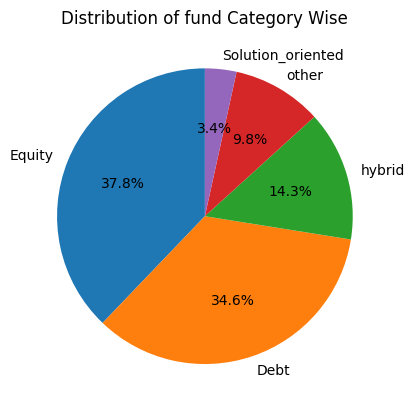

In [19]:
# Let plot Catogory Wise Fund Dstribution
values = [308,282,116,80,28]
plt.pie(values,labels=['Equity','Debt','hybrid','other','Solution_oriented'],autopct= '%1.1f%%',startangle = 90)
plt.title("Distribution of fund Category Wise")
plt.show()

# Numerical Features EDA

In [20]:
num_col = df.select_dtypes(exclude = ['object'])
num_col

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
0,100,100,0.27,10.0,10,3,3,4.0,6.5,6.900000
1,1000,1000,0.36,4288.0,10,1,3,5.6,4.8,5.500000
2,1000,1000,0.53,157.0,10,5,3,2.0,18.9,9.700000
3,500,1000,0.76,637.0,4,6,2,-0.7,17.1,9.490726
4,100,100,0.61,6386.0,10,6,4,4.5,18.6,9.700000
...,...,...,...,...,...,...,...,...,...,...
809,500,15000,0.96,5068.0,10,4,0,-0.7,13.1,6.200000
810,500,5000,1.16,6740.0,10,6,4,1.7,27.2,12.200000
811,500,500,0.26,197.0,4,1,1,5.3,3.8,9.490726
812,500,500,0.22,14.0,4,1,1,1.7,32.4,13.300000


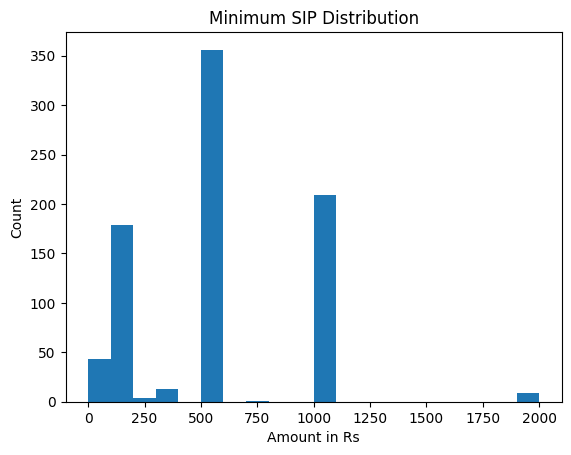

In [21]:
plt.hist(num_col['min_sip'],bins=20)
plt.title('Minimum SIP Distribution')
plt.xlabel("Amount in Rs")
plt.ylabel("Count")
plt.show()

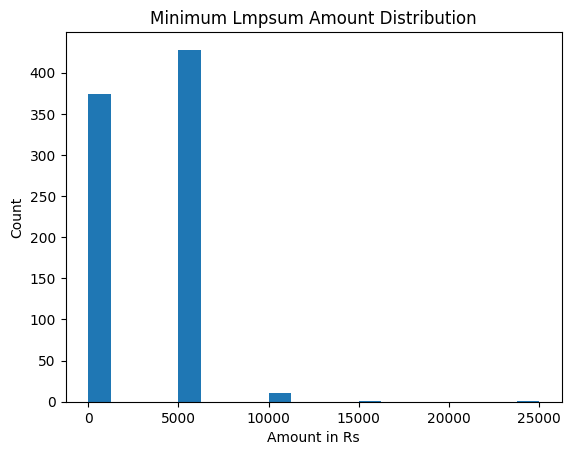

In [23]:
plt.hist(num_col['min_lumpsum'],bins=20)
plt.title('Minimum Lmpsum Amount Distribution')
plt.xlabel("Amount in Rs")
plt.ylabel("Count")
plt.show()

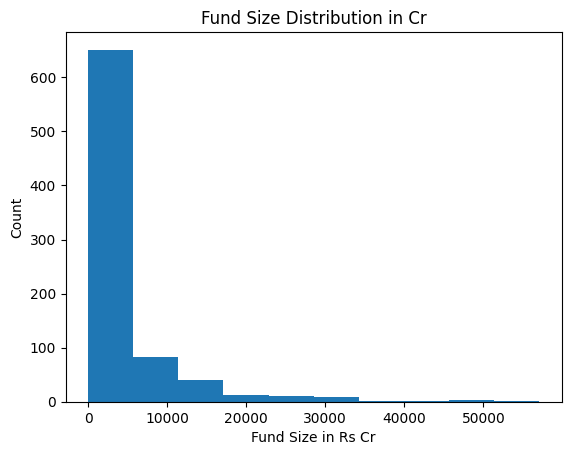

In [24]:
plt.hist(num_col['fund_size_cr'],bins=10)
plt.title("Fund Size Distribution in Cr")
plt.xlabel("Fund Size in Rs Cr")
plt.ylabel("Count")
plt.show()

In [25]:
final_df = pd.concat([num_col,cat_col],axis=1, join='outer')
final_df.head(2)

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr,scheme_name,fund_manager,sortino,alpha,sd,beta,sharpe,amc_name,category,sub_category
0,100,100,0.27,10.0,10,3,3,4.0,6.5,6.9,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Aditya Birla Sun Life Mutual Fund,Other,FoFs Domestic
1,1000,1000,0.36,4288.0,10,1,3,5.6,4.8,5.5,Aditya Birla SL Arbitrage Fund,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,Aditya Birla Sun Life Mutual Fund,Hybrid,Arbitrage Mutual Funds


# **Let's Find Highest Return Fund details of 1Year**

In [26]:
max_return_1yr = final_df.loc[final_df['returns_1yr'].idxmax()]
max_return_1yr_prcnt = max_return_1yr[['returns_1yr','amc_name','category']]
max_return_1yr_prcnt

returns_1yr                        130.8
amc_name       Bank of India Mutual Fund
category                            Debt
Name: 89, dtype: object

# **Let's Find Lowest Return Fund Details of 1Year**

In [27]:
min_return_1yr = final_df.loc[final_df['returns_1yr'].idxmin()]
min_return_1yr_prcnt = min_return_1yr[['returns_1yr','amc_name','category']]
min_return_1yr_prcnt

returns_1yr                           -19.7
amc_name       ICICI Prudential Mutual Fund
category                             Equity
Name: 347, dtype: object

# **Let's Find highest Return Fund Details of 3year**

In [28]:
max_return_3yr = final_df.loc[final_df['returns_3yr'].idxmax()]
max_return_3yr_prcnt = max_return_1yr[['returns_3yr','amc_name','category']]
max_return_3yr_prcnt

returns_3yr                         12.8
amc_name       Bank of India Mutual Fund
category                            Debt
Name: 89, dtype: object

# **Let's Find lowest Return Fund Details of 3year**

In [29]:
min_return_3yr = final_df.loc[final_df['returns_3yr'].idxmin()]
min_return_3yr_prcnt = min_return_1yr[['returns_3yr','amc_name','category']]
min_return_3yr_prcnt

returns_3yr                            45.3
amc_name       ICICI Prudential Mutual Fund
category                             Equity
Name: 347, dtype: object

# **Let's Find highest Return Fund Details of 5year**

In [30]:
max_return_5yr = final_df.loc[final_df['returns_5yr'].idxmax()]
max_return_5yr_prcnt = max_return_5yr[['returns_5yr','amc_name','category']]
max_return_5yr_prcnt

returns_5yr                 23.2
amc_name       Quant Mutual Fund
category                  Equity
Name: 608, dtype: object

# **Let's Find lowest Return Fund Details of 5year**

In [31]:
min_return_5yr = final_df.loc[final_df['returns_5yr'].idxmin()]
min_return_5yr_prcnt = min_return_5yr[['returns_5yr','amc_name','category']]
min_return_5yr_prcnt

returns_5yr                         -4.1
amc_name       Bank of India Mutual Fund
category                            Debt
Name: 89, dtype: object